<h3 style="text-align:center;" >Proyecto Individual 2</h3>
<h3 style="text-align:center;">TELECOMUNICACIONES</h3>

In [300]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga de Datos

In [301]:
# Leer el archivo Excel con todas las hojas
excel_path = r'C:\HENRY\PROYECTOS HENRY 11\Segundo Proyecto Individual\datasets\Internet.xlsx'
sheets_dict = pd.read_excel(excel_path, sheet_name=None)

Mostrando las hojas del libro de excel

In [302]:
excel_file = pd.ExcelFile(excel_path)
print(excel_file.sheet_names)

['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos']


<h2 style="color:#6495ED; text-align:center;">Ingresos</h2>

Cargamos la hoja Ingresos, y formateamos para que muestre el valor numerico con 2 decimales

In [303]:
df_ingresos = pd.read_excel(excel_path, sheet_name='Ingresos')
pd.set_option('display.float_format', '{:.2f}'.format)
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,442032166.69,Abr-Jun 2024
1,2024,1,346198986.13,Ene-Mar 2024
2,2023,4,167376014.80,Oct-Dic 2023
3,2023,3,133106593.41,Jul-Sept 2023
4,2023,2,118060280.28,Abr-Jun 2023


Usamos la función describe() para ver el resumen estadistico de las columnas numéricas

In [304]:
df_ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,42.00,42.00,42.00
mean,2018.76,2.45,50016480.78
std,3.07,1.13,87102080.46
min,2014.00,1.00,2984054.21
25%,2016.00,1.25,7055326.25
50%,2019.00,2.00,20475265.73
75%,2021.00,3.00,44850901.45
max,2024.00,4.00,442032166.69


Comprobamos duplicados, y se concluye que no contiene datos duplicados

In [305]:
df_ingresos.duplicated().sum()

np.int64(0)

Comprobamos valores nulos, y se suman por cada columna.
Se concluye que no hay datos nulos.

In [306]:
df_ingresos.isna().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

<h2 style="color:#6495ED; text-align:center;">Ventas por año</h2>

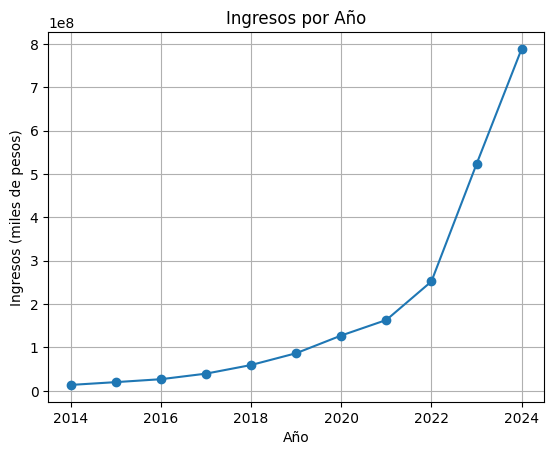

In [307]:
# Agrupar los datos por año y sumar los ingresos 
ingresos_por_ano = df_ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index() 

# Graficar los datos de ingresos por año
plt.plot(ingresos_por_ano['Año'], ingresos_por_ano['Ingresos (miles de pesos)'], marker='o', linestyle='-') 
plt.title('Ingresos por Año') 
plt.xlabel('Año') 
plt.ylabel('Ingresos (miles de pesos)') 
plt.grid(True)

Los ingresos muestran un crecimiento acelerado, especialmente a partir de 2021. Se observa una aceleración drástica entre 2023 y 2024, lo que evidencia un aumento significativo en el volumen de ingresos en ese periodo.

<h2 style="color:#6495ED; text-align:center;">Ingresos por Trimestre</h2>

In [359]:
# Agrupar los datos por trimestre y sumar los ingresos 
ingresos_trimestre = df_ingresos.groupby('Trimestre')['Ingresos (miles de pesos)'].sum().reset_index() 

ingresos_trimestre

,Trimestre,Ingresos (miles de pesos)
0,1,628053238.60
1,2,750102169.82
2,3,334865311.73
3,4,387671472.73


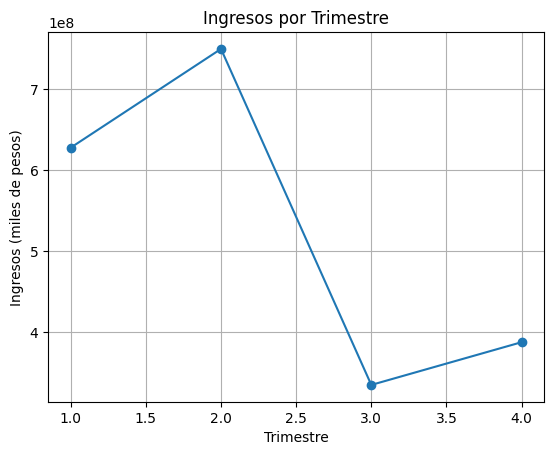

In [360]:

# Graficar los datos de ingresos por trimestre
plt.plot(ingresos_trimestre['Trimestre'], ingresos_trimestre['Ingresos (miles de pesos)'], marker='o', linestyle='-') 
plt.title('Ingresos por Trimestre') 
plt.xlabel('Trimestre') 
plt.ylabel('Ingresos (miles de pesos)') 
plt.grid(True)

El segundo trimestre tiene el promedio de ingresos más alto con 750,102,169.82 miles de pesos, lo que lo posiciona como el periodo más rentable entre todos los trimestres. Esto podría deberse a actividades económicas o eventos específicos que ocurren regularmente en esta parte del año, como temporadas de mayor consumo o productividad.

<h2 style="color:#6495ED; text-align:center;">Accesos_Tecnologia_Localidad</h2>

In [309]:
df_accesos_localidad = pd.read_excel(excel_path, sheet_name='Accesos_tecnologia_localidad')
df_accesos_localidad.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.00
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.00
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.00
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.00
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.00


Usamos la función describe() para ver el resumen estadístico de las columnas numéricas.

In [310]:
df_accesos_localidad.describe()

,Accesos
count,7747.00
mean,1491.69
std,15201.74
min,0.00
25%,3.00
50%,59.00
75%,400.50
max,1144781.00


Comprobamos valores nulos, y se suman por cada columna.
Y encontramos 6 valores nulos en la columna accesos.

In [311]:
df_accesos_localidad.isna().sum()

Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Link Indec    0
Accesos       6
dtype: int64

Reemplazamos los valores nulos con 0

In [312]:
df_accesos_localidad = df_accesos_localidad.fillna({'Accesos': 0})

Comprobamos que el reemplazo haya sido efectivo

In [313]:
df_accesos_localidad.isna().sum()

Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Link Indec    0
Accesos       0
dtype: int64

Identificamos los valores únicos de la columna Tecnología

In [314]:
df_accesos_localidad['Tecnologia'].unique()

array(['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS',
       'Otros', 'DIAL UP', 'OTROS', 'WIMAX', 'Cablemodem'], dtype=object)

Identificamos que hay algunos valores escritos de diferente manera y los unimos, reemplazando con una sola variable.

In [315]:
#Reemplazando valores con el mismo nombre en mayuscula y minuscula
df_accesos_localidad['Tecnologia'] = df_accesos_localidad['Tecnologia'].replace(['Otros', 'OTROS'], 'OTROS')
df_accesos_localidad['Tecnologia'].unique()

array(['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS',
       'OTROS', 'DIAL UP', 'WIMAX', 'Cablemodem'], dtype=object)

Comprobamos nuevamente los valores únicos ya corregidos.

In [316]:
df_accesos_localidad['Tecnologia'] = df_accesos_localidad['Tecnologia'].replace(['Cablemodem', 'CABLEMODEM'], 'CABLEMODEM')
df_accesos_localidad['Tecnologia'].unique()

array(['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS',
       'OTROS', 'DIAL UP', 'WIMAX'], dtype=object)

<h3 style="color:red; text-align:center;">Gráfica de Accesos por Provincia</h3>

In [317]:
# Agrupar Accesos por Provincia y los organizamos de manera descendente.
Acceso_Provincia = df_accesos_localidad.groupby('Provincia')['Accesos'].sum().reset_index().sort_values(by='Accesos', ascending=False).reset_index(drop=True)
Acceso_Provincia.head()

,Provincia,Accesos
0,BUENOS AIRES,4989380.00
1,CABA,1463599.00
2,CORDOBA,1085774.00
3,SANTA FE,930973.00
4,MENDOZA,301653.00


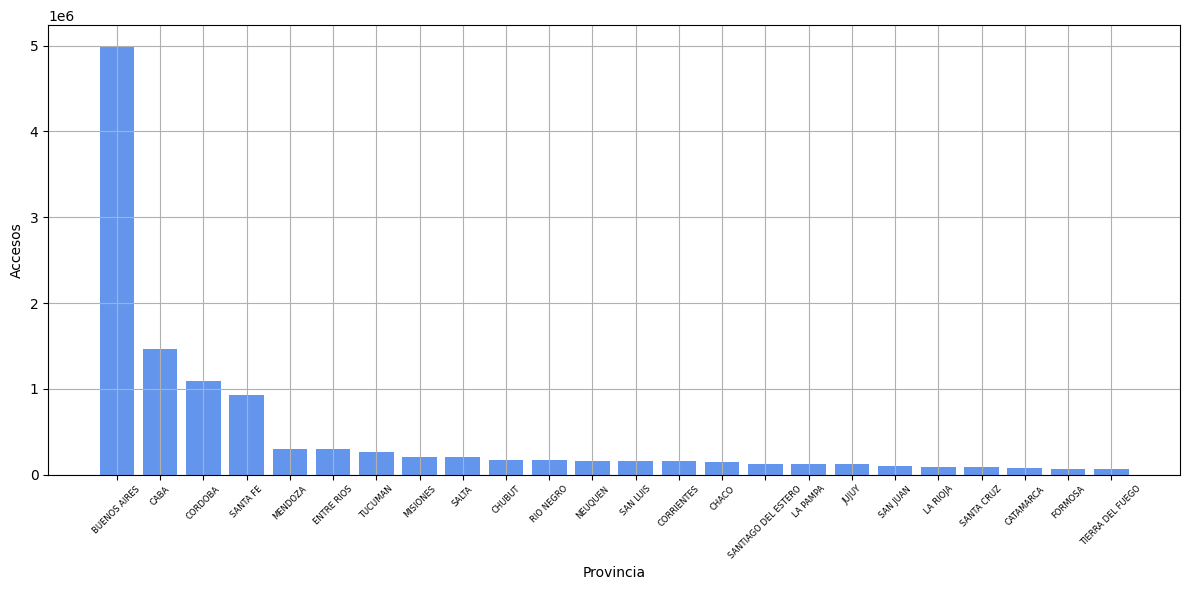

In [318]:
# Graficar los datos
plt.figure(figsize=(12, 6))
plt.bar(Acceso_Provincia['Provincia'], Acceso_Provincia['Accesos'], color='#6495ED', label='Accesos')
plt.xlabel('Provincia') 
plt.ylabel('Accesos') 
plt.xticks(rotation=45, fontsize=6)
plt.tight_layout()
plt.grid(True)

La gráfica muestra disparidades regionales en el acceso a internet. Es posible que haya provincias con acceso más limitado en comparación con otras que están más conectadas.
Para este caso, se observa que la ciudad con mayor acceso a internet es Buenos Aires, con una diferencia demasiado marcada en comparación con las demás provincias.

Agrupamos los Accesos por tecnología

In [319]:
Acceso_tecnologia = df_accesos_localidad.groupby('Tecnologia')['Accesos'].sum().reset_index() 
Acceso_tecnologia.sort_values(by='Accesos')

,Tecnologia,Accesos
6,WIMAX,2238.00
5,SATELITAL,2930.00
2,DIAL UP,11793.00
4,OTROS,174996.00
7,WIRELESS,593197.00
0,ADSL,733491.00
3,FIBRA OPTICA,4169958.00
1,CABLEMODEM,5867504.00


<h2 style="color:#6495ED; text-align:center;">ACCESOS POR TECNOLOGÍA</h2>

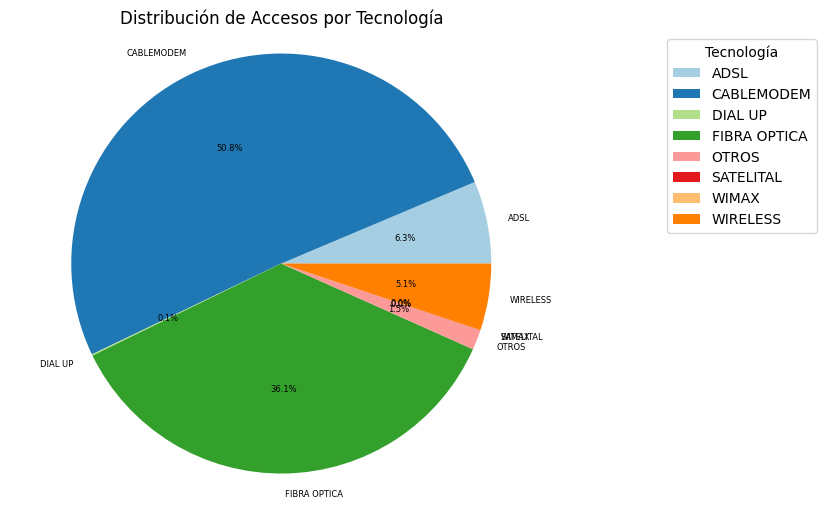

In [320]:
# Accesos por tecnología

Acceso_tecnologia = df_accesos_localidad.groupby('Tecnologia')['Accesos'].sum().reset_index()
# Graficar el diagrama circular 
plt.figure(figsize=(7, 6)) 
plt.pie(Acceso_tecnologia['Accesos'], labels=Acceso_tecnologia['Tecnologia'], autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontsize': 6}) 
plt.title('Distribución de Accesos por Tecnología') 
plt.axis('equal')
plt.legend( Acceso_tecnologia['Tecnologia'], title="Tecnología", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.show()

Podemos concluir que la tecnología más usada ahora mismo en el territorio argentino es el cablemodem, sin embargo se puede observar una fuerte tendencia hacia la implementación de la fibra optica, ubicandose en el segundo lugar de los accesos a internet.

<h2 style="color:#6495ED; text-align:center;">PENETRACIÓN POBLACIÓN</h2>

Agrupamos los Accesos por cada 100 habitantes por provincia

In [321]:
df_penetracion_poblacion = pd.read_excel(excel_path, sheet_name='Penetración-poblacion')
df_penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


Comprobamos valores nulos, y se suman por cada columna.
Se concluye que no hay datos nulos.

In [322]:
df_penetracion_poblacion.isnull().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [323]:
df_penetracion_poblacion['Provincia'].nunique()

24

Comprobamos duplicados, y se concluye que no contiene datos duplicados


In [324]:
df_penetracion_poblacion.duplicated().sum()

np.int64(0)

In [325]:
df_penetracion_poblacion.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')

In [326]:
df_penetracion_poblacion['Año'] = pd.to_datetime(df_penetracion_poblacion['Año'], format='%Y')


In [327]:

# Verificar el tipo de datos de la columna 'Año'
tipo_dato = df_penetracion_poblacion['Año'].dtype

print(tipo_dato)


datetime64[ns]


In [328]:
df_penetracion_poblacion.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,1000,1000.00,1000.00
mean,2018-10-20 01:20:38.400000,2.46,15.73
min,2014-01-01 00:00:00,1.00,2.72
25%,2016-01-01 00:00:00,1.00,9.02
50%,2019-01-01 00:00:00,2.00,13.67
75%,2021-01-01 00:00:00,3.00,20.32
max,2024-01-01 00:00:00,4.00,52.24
std,NaN,1.11,9.24


In [329]:
#Agrupar los accesos por cada 100 habitantes por provincia
penetracion_poblacion = df_penetracion_poblacion.groupby('Provincia')['Accesos por cada 100 hab'].mean().reset_index()
penetracion_poblacion = penetracion_poblacion.sort_values(by='Accesos por cada 100 hab', ascending= False)
penetracion_poblacion.head()

,Provincia,Accesos por cada 100 hab
1,Capital Federal,46.18
10,La Pampa,24.79
22,Tierra Del Fuego,24.70
0,Buenos Aires,21.59
6,Córdoba,21.52


<h3 style="color:#FF8C00; text-align:center;">Gráfica de promedio Accesos por cada 100 habitantes por Provincia</h3>

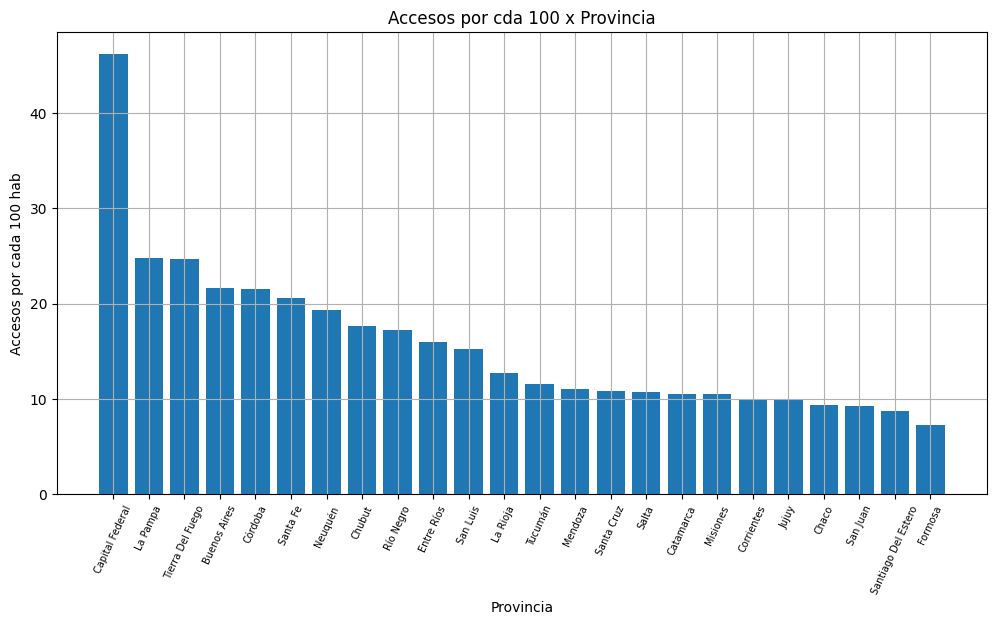

In [330]:
#Gráfica de accesos por provincia
plt.figure(figsize=(12, 6))
plt.bar(penetracion_poblacion['Provincia'], penetracion_poblacion['Accesos por cada 100 hab'] ) 
plt.title('Accesos por cda 100 x Provincia') 
plt.xlabel('Provincia') 
plt.ylabel('Accesos por cada 100 hab')
plt.xticks(rotation=65, fontsize=7) 
plt.grid(True)

La distribución de los datos es bastante dispersa, lo que indica una variabilidad considerable en el número de accesos entre las diferentes regiones. 
La gran dispersión en los datos sugiere que existe una desigualdad en el acceso al servicio dado que algunas regiones tienen un acceso mucho más amplio que otras.

                           Año  Trimestre  Accesos por cada 100 hab
Año                       1.00      -0.09                      0.37
Trimestre                -0.09       1.00                      0.00
Accesos por cada 100 hab  0.37       0.00                      1.00


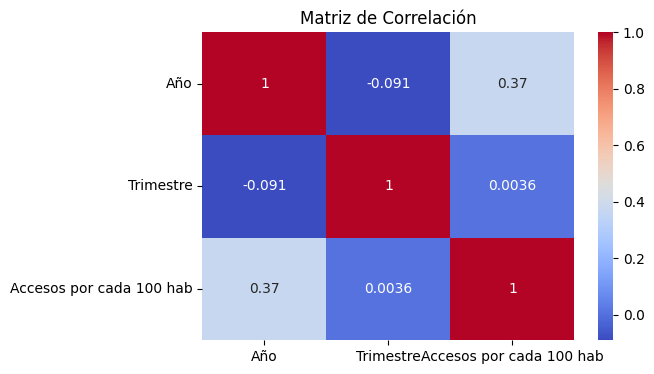

In [331]:

# Excluir la columna 'Provincia' del cálculo de la matriz de correlación
df_numerico = df_penetracion_poblacion.drop(columns=['Provincia'])

# Calcular la matriz de correlación
correlacion = df_numerico.corr()
print(correlacion)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



<h3 style="color:#FF8C00; text-align:center;">Accesos por cada 100 habitantes por año</h3>

In [332]:
#Agrupar los accesos por cada 100 habitantes por año
accesos_año = df_penetracion_poblacion.groupby('Año')['Accesos por cada 100 hab'].mean().reset_index() 
accesos_año.sort_values(by='Año', ascending= False)


,Año,Accesos por cada 100 hab
10,2024-01-01,21.27
9,2023-01-01,20.70
8,2022-01-01,20.05
7,2021-01-01,18.34
6,2020-01-01,16.66
5,2019-01-01,16.01
4,2018-01-01,14.54
3,2017-01-01,12.93
2,2016-01-01,11.94
1,2015-01-01,11.73


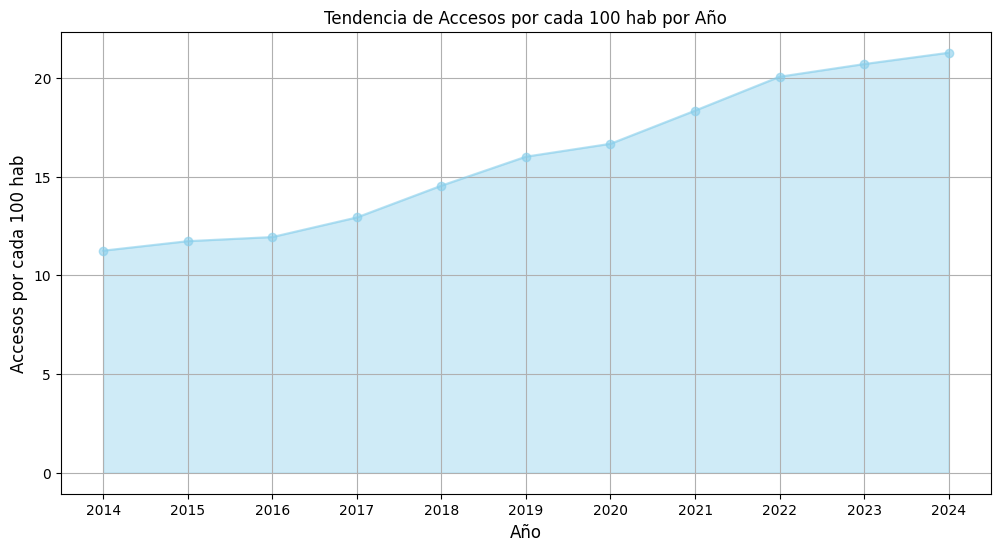

In [333]:
plt.figure(figsize=(12, 6))
plt.fill_between(accesos_año['Año'], accesos_año['Accesos por cada 100 hab'], color='skyblue', alpha=0.4)
plt.plot(accesos_año['Año'], accesos_año['Accesos por cada 100 hab'], marker='o', color='skyblue', alpha=0.6)
plt.title('Tendencia de Accesos por cada 100 hab por Año')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos por cada 100 hab', fontsize=12)
plt.grid(True)
plt.show()


El número de accesos ha aumentado consistentemente desde 2014 hasta 2024, mostrando una tendencia positiva sostenida. Aunque la tendencia es de crecimiento, el ritmo de aumento varía ligeramente entre años. Esto puede reflejar periodos de mayor o menor inversión, cambios en políticas públicas, o situaciones económicas específicas.

<h3 style="color:#FF8C00; text-align:center;">Mapa de Calor de Accesos por cada 100 habitantes por provincia y año</h3>

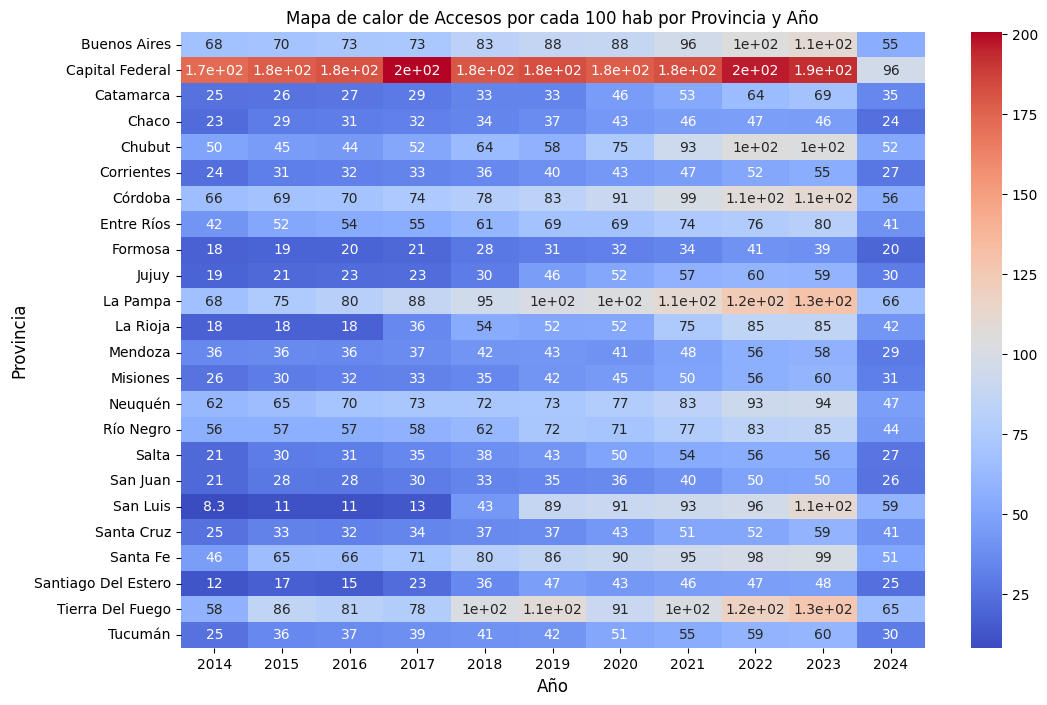

In [334]:
df_penetracion_poblacion['Año'] = df_penetracion_poblacion['Año'].dt.year
# Agrupar los datos por Provincia y Año, y sumar los valores
df_agrupado = df_penetracion_poblacion.groupby(['Provincia', 'Año'])['Accesos por cada 100 hab'].sum().reset_index()

# Crear la tabla pivote
pivot_table = df_agrupado.pivot(index='Provincia', columns='Año', values='Accesos por cada 100 hab')

# Visualizar la tabla pivote con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de Accesos por cada 100 hab por Provincia y Año')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.show()



La gráfica de calor muestra la evolución del acceso a internet por cada 100 habitantes en diferentes provincias de Argentina a lo largo de varios años. El color más intenso (rojo) indica un mayor número de accesos, mientras que el color más frío (azul) representa un menor número.
A nivel nacional se observa una tendencia general al aumento del acceso a internet a lo largo de los años. Esto indica que la conectividad ha mejorado en todo el país.
A pesar de la tendencia al aumento, existen diferencias notables entre las provincias. Algunas regiones presentan un acceso mucho mayor que otras, lo que evidencia una brecha digital.

<h2 style="color:#6495ED; text-align:center;">PENETRACIÓN HOGARES</h2>

In [335]:
df_penetracion_hogares = pd.read_excel(excel_path, sheet_name='Penetracion-hogares')
df_penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


Comprobamos valores nulos, y se suman por cada columna. <br>
Se concluye que no hay datos nulos.

In [336]:
df_penetracion_hogares.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

Comprobamos duplicados, y se concluye que no contiene datos duplicados


In [337]:
df_penetracion_hogares.duplicated().sum()

np.int64(0)

In [338]:
#Exploramos las columnas del dataframe
df_penetracion_hogares.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

In [339]:
#Agrupar los accesos por Provincia por cada 100 hogares
penetracion_hogares = df_penetracion_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].mean().reset_index() 
penetracion_hogares

,Provincia,Accesos por cada 100 hogares
0,Buenos Aires,66.30
1,Capital Federal,114.25
2,Catamarca,41.21
3,Chaco,34.98
4,Chubut,57.64
5,Corrientes,37.97
6,Córdoba,70.30
7,Entre Ríos,53.52
8,Formosa,28.37
9,Jujuy,39.06


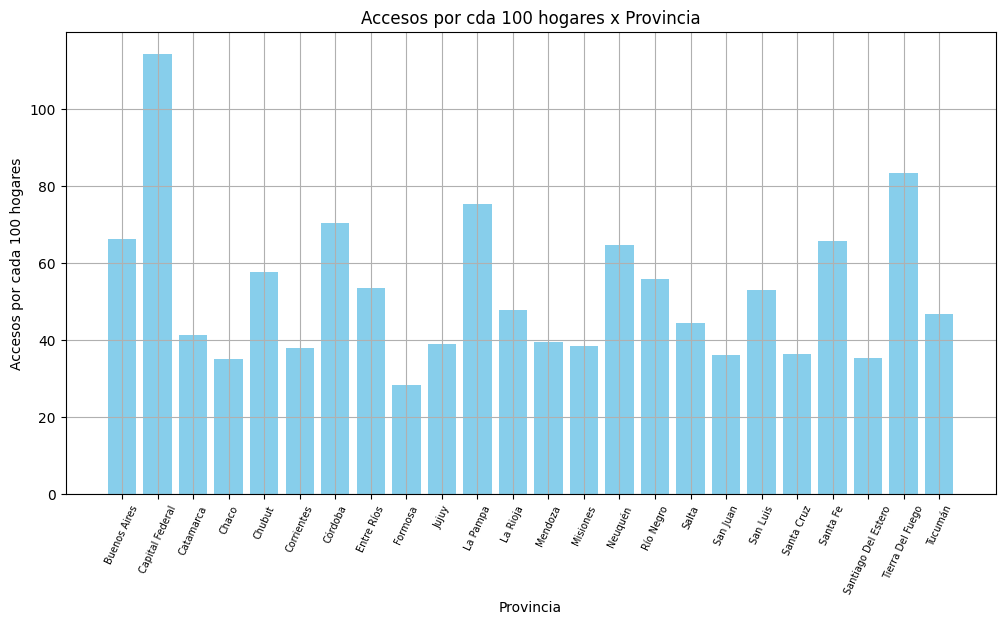

In [340]:
#Gráfica de accesos por hogares
plt.figure(figsize=(12, 6))
plt.bar(penetracion_hogares['Provincia'], penetracion_hogares['Accesos por cada 100 hogares'],color='skyblue') 
plt.title('Accesos por cda 100 hogares x Provincia') 
plt.xlabel('Provincia') 
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=65, fontsize=7) 
plt.grid(True)

Existe una notable disparidad en el acceso a tecnología entre provincias. Si bien existe una tendencia generalizada hacia la conectividad, se observan diferencias significativas entre las distintas regiones. Esta brecha puede reflejar desigualdad en infraestructura, nivel socioeconómico o políticas locales.
Las provincias con mayor cantidad en el acceso suelen estar asociadas con mayor desarrollo económico, mayor urbanización o acceso a recursos tecnológicos como grandes ciudades o capitales.

In [341]:
#Agrupar los accesos por año en los hogares
accesos_año_hogar = df_penetracion_hogares.groupby('Año')['Accesos por cada 100 hogares'].mean().reset_index() 
accesos_año_hogar

,Año,Accesos por cada 100 hogares
0,2014,37.34
1,2015,39.20
2,2016,39.89
3,2017,42.53
4,2018,48.48
5,2019,53.67
6,2020,56.13
7,2021,61.98
8,2022,67.82
9,2023,70.04


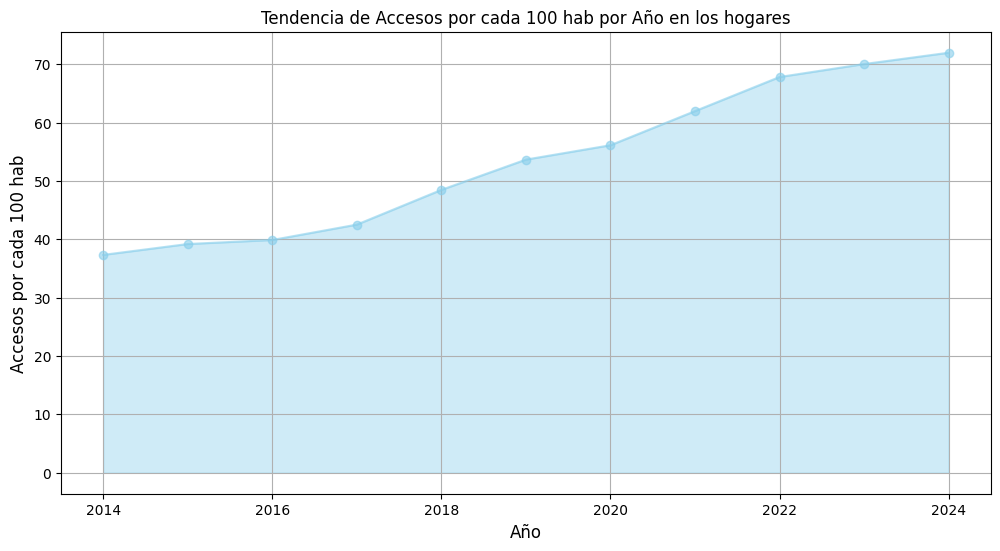

In [342]:
plt.figure(figsize=(12, 6))
plt.fill_between(accesos_año_hogar['Año'], accesos_año_hogar['Accesos por cada 100 hogares'], color='skyblue', alpha=0.4)
plt.plot(accesos_año_hogar['Año'], accesos_año_hogar['Accesos por cada 100 hogares'], marker='o', color='skyblue', alpha=0.6)
plt.title('Tendencia de Accesos por cada 100 hab por Año en los hogares')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos por cada 100 hab', fontsize=12)
plt.grid(True)
plt.show()

El número de accesos por cada 100 hogares ha crecido continuamente en el periodo analizado, pasando de 37.34 en 2014 a 71.98 en 2024.
Esto indica una adopción creciente de tecnologías que facilitan el acceso a Internet en los hogares.
Aunque hay pequeñas fluctuaciones, el ritmo general del incremento ha sido consistente, reflejando una expansión sostenida en infraestructura o asequibilidad.

<h2 style="color:#6495ED; text-align:center;">PENETRACION TOTALES</h2>

In [343]:
df_penetracion_total = pd.read_excel(excel_path, sheet_name='Penetracion-totales')
df_penetracion_total.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


Usamos la función describe() para ver el resumen estadístico de las columnas numéricas.

In [344]:
df_penetracion_total.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,42.00,42.00,42.00,42.00
mean,2018.76,2.45,63.20,19.57
std,3.07,1.13,9.95,3.27
min,2014.00,1.00,49.55,15.05
25%,2016.00,1.25,53.78,16.52
50%,2019.00,2.00,62.67,19.40
75%,2021.00,3.00,72.53,22.60
max,2024.00,4.00,78.89,24.79


Comprobamos valores nulos, y se suman por cada columna.<br>
Se concluye que no hay datos nulos.

In [345]:
df_penetracion_total.isnull().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

Comprobamos duplicados, y se concluye que no contiene datos duplicados

In [346]:
df_penetracion_total.duplicated().sum()

np.int64(0)

In [347]:
df_penetracion_total.columns

Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')

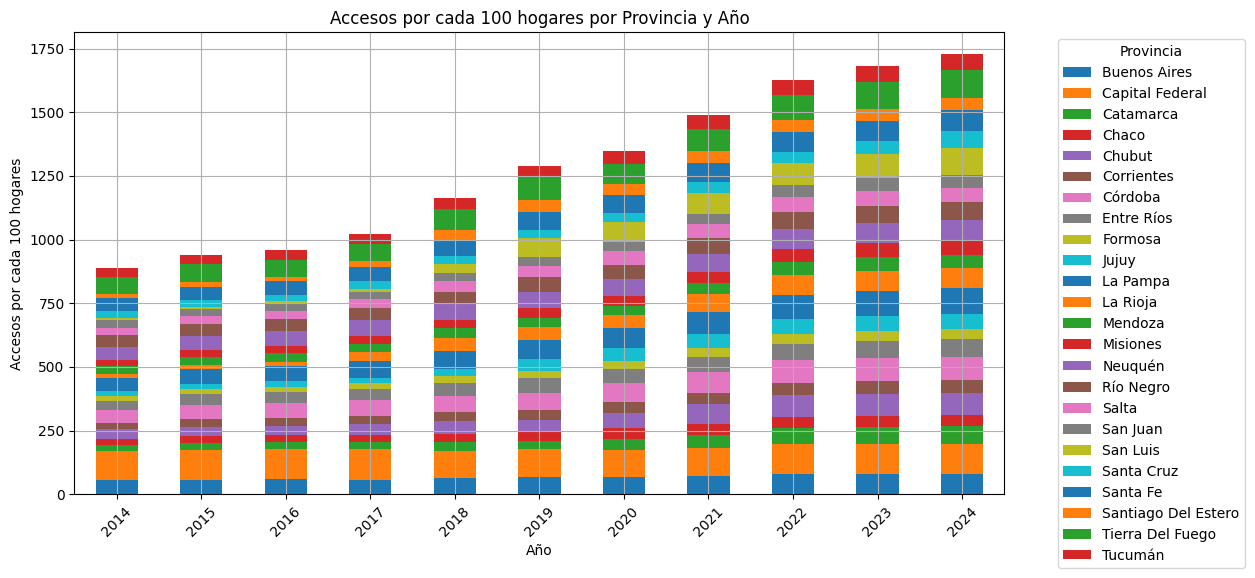

In [358]:
# Agrupar los datos por Año, Provincia y promediar los valores
accesos_agrupados = df_penetracion_hogares.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].mean().unstack()

# Crear la gráfica de barras apiladas
accesos_agrupados.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Accesos por cada 100 hogares por Provincia y Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar la gráfica
plt.show()


Los accesos por cada 100 hogares aumentan progresivamente en todas las provincias desde 2014 hasta 2024. Esto confirma una tendencia positiva hacia la expansión de la conectividad en el país.<br>
Las barras apiladas muestran diferencias significativas en los aportes de cada provincia al total de accesos. Provincias como Capital Federal, Buenos Aires y Córdoba tienen una participación más alta que otras, reflejando una brecha digital entre regiones.